## (0) Carregando bibliotecas

In [1]:
# Display all results in a single notebook input:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
import os
import pysal
from pyproj import CRS
from shapely.geometry import Point, MultiPoint, Polygon, mapping
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx
import osmnx as ox
from fiona.crs import from_epsg
import pickle

C:\Users\Jorge\Anaconda3\lib\site-packages\pysal\explore\segregation\network\network.py:16: UserWarning: You need pandana and urbanaccess to work with segregation's network module
You can install them with  `pip install urbanaccess pandana` or `conda install -c udst pandana urbanaccess`
  "You need pandana and urbanaccess to work with segregation's network module\n"
C:\Users\Jorge\Anaconda3\lib\site-packages\pysal\model\spvcm\abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


In [3]:
ox.config(log_console=True, use_cache=True)
ox.__version__

'0.11.4'

* **Lendo os equipamentos de saúde:**

In [482]:
eqs_saude = gpd.read_file('Equipam_saude_basicos_Itapagipe.shp')

In [483]:
eqs_saude.head(15)

OBJECTID_1  OBJECTID   TEMA  MUN_CODMUN  LOG_CODLOG  PTN_NUMMET  \
0       3076.0    2975.0  SAUDE      2740.0     11440.0         0.0   
1        165.0     106.0  SAUDE      2740.0      1357.0         0.0   
2        727.0     580.0  SAUDE      2740.0       185.0         0.0   
3        730.0     583.0  SAUDE      2740.0       943.0         0.0   
4       1873.0    2008.0  SAUDE      2740.0       539.0         0.0   
5        471.0     308.0  SAUDE      2740.0      1245.0         0.0   
6        478.0     317.0  SAUDE      2740.0       763.0         0.0   
7       2986.0    2881.0  SAUDE      2740.0      1589.0         0.0   
8        492.0     321.0  SAUDE      2740.0       271.0         0.0   
9          NaN       NaN   None         NaN         NaN         NaN   
10         NaN       NaN   None         NaN         NaN         NaN   

    PTN_SEQPTN  POS_POSICA  TPN_CODTEM  \
0          0.0         2.0        18.0   
1          0.0         2.0        18.0   
2          0.0         1.0        18.0   
3          0.0         2.0        18.0   
4          0.0         1.0        18.0   
5          0.0         1.0        18.0   
6          0.0         2.0        18.0   
7          0.0         2.0        18.0   
8          0.0         1.0        18.0   
9          NaN         NaN         NaN   
10         NaN         NaN         NaN   

                                           PTN_NOMPTN  ...  PTN_DHULTI  \
0   UNIDADE DE SAUDE DA FAMILIA CENTRO OESTE (CAND...  ...  2007-02-28   
1                                   HOSPITAL S. JORGE  ...  2003-12-31   
2                    HOSPITAL GERAL - POLICIA MILITAR  ...  2003-12-31   
3            UNIDADE BASICA DE SAUDE MINISTRO ALKIMIN  ...  2003-12-31   
4        UNIDADE BASICA DE SAUDE VIRGILIO DE CARVALHO  ...  2003-12-31   
5           MATERNIDADE E HOSPITAL DA SAGRADA FAMILIA  ...  2003-12-31   
6               CENTRO MEDICO HOSPITALAR AGENOR PAIVA  ...  2003-12-31   
7          UNIDADE DE SAUDE DA FAMILIA FIAIS - LOBATO  ...  2006-08-10   
8                               HOSPITAL STO. ANTONIO  ...  2003-12-31   
9                                                None  ...        None   
10                                               None  ...        None   

    PTN_DLEVAN PTN_METADA                          PTA_ABREV verif_PMS  \
0   2006-06-01          6  USF CENT. OESTE (CANDIDO PEREIRA)       sim   
1         None          6                     HOSP. S. JORGE       não   
2         None          6         HOSP. GERAL - POL. MILITAR       não   
3         None          6               UBS MINISTRO ALKIMIN       sim   
4         None          6           UBS VIRGILIO DE CARVALHO       sim   
5         None          6    MATER. E HOSP. DA SAGR. FAMILIA       não   
6         None          6      CENT. MED. HOSP. AGENOR PAIVA       não   
7   2006-03-31          6                 USF FIAIS - LOBATO       sim   
8         None          6                 HOSP. STO. ANTONIO       não   
9         None       None                               None       sim   
10        None       None                               None       sim   

        TIPO                                            ENDRECO  \
0        USF  Conj. Joanes Centro Oeste Qd. 18 L 17 Hamesa-L...   
1   HOSPITAL                                               None   
2   HOSPITAL                                               None   
3        UBS                    R Lopes Trovão s/n Massaranduba   
4        UBS                 R. Duarte da Costa s/n Dendezeiros   
5   HOSPITAL                                               None   
6   HOSPITAL                                               None   
7        USF            Rua Voluntários da Pátria nº 67 - Fiais   
8   HOSPITAL  Avenida Dendezeiros do Bonfim, 161, Bonfim, Sa...   
9        UPA  R. do Forno, 1-121 - Santa Monica Salvador - B...   
10      CAPS  R. do Céu, 77 - Caminho de Areia Salvador - BA...   

                   TELEFONES                                   

In [484]:
eqs_saude.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Adicionando o Pronto Atendimento (PA):

In [485]:
pa = gpd.read_file('Pronto_atentimento_prox_Itapagipe.shp')

In [486]:
pa.head(5)

OBJECTID_1  OBJECTID   TEMA  MUN_CODMUN  LOG_CODLOG  PTN_NUMMET  \
0       417.0     269.0  SAUDE      2740.0       487.0         0.0   
1         NaN       NaN   None         NaN         NaN         NaN   
2         1.0       NaN  SAUDE         NaN         NaN         NaN   

   PTN_SEQPTN  POS_POSICA  TPN_CODTEM                       PTN_NOMPTN  ...  \
0         0.0         2.0        18.0  UNIDADE DE EMERGENCIA DO CURUZU  ...   
1         NaN         NaN         NaN                             None  ...   
2         NaN         NaN         NaN                 UPA CIDADE BAIXA  ...   

   PTN_METADA            PTA_ABREV verif_PMS  TIPO  \
0           6  UNID. EMERG. CURUZU       não    PA   
1        None                 None       sim   UPA   
2        None                 None      None  None   

                                             ENDRECO  \
0              Rua do Curuzu, S/N, Curuzu, Liberdade   
1  R. do Forno, 1-121 - Santa Monica Salvador - B...   
2                                         Largo Roma   

                  TELEFONES                                Nome_PMS     Rede  \
0             (71)3256-1443  Unidade de Emergência Mãe Hilda Jitolu  público   
1  (71) 3256-2404 3481-8033                  \nUPA San Martin (24h)  público   
2                      None                        Upa Cidade Baixa  público   

  SOS                        geometry  
0   s  POINT (555632.543 8568803.640)  
1   s  POINT (556274.618 8568667.445)  
2   s  POINT (553592.379 8569961.822)  

[3 rows x 25 columns]

In [487]:
pa.loc[2,'TIPO'] = 'UPA'

In [488]:
pa.crs

<Projected CRS: EPSG:31984>
Name: SIRGAS 2000 / UTM zone 24S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Brazil - 42°W to 36°W
- bounds: (-42.0, -26.35, -36.0, 0.74)
Coordinate Operation:
- name: UTM zone 24S
- method: Transverse Mercator
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [489]:
pa.head()

OBJECTID_1  OBJECTID   TEMA  MUN_CODMUN  LOG_CODLOG  PTN_NUMMET  \
0       417.0     269.0  SAUDE      2740.0       487.0         0.0   
1         NaN       NaN   None         NaN         NaN         NaN   
2         1.0       NaN  SAUDE         NaN         NaN         NaN   

   PTN_SEQPTN  POS_POSICA  TPN_CODTEM                       PTN_NOMPTN  ...  \
0         0.0         2.0        18.0  UNIDADE DE EMERGENCIA DO CURUZU  ...   
1         NaN         NaN         NaN                             None  ...   
2         NaN         NaN         NaN                 UPA CIDADE BAIXA  ...   

   PTN_METADA            PTA_ABREV verif_PMS TIPO  \
0           6  UNID. EMERG. CURUZU       não   PA   
1        None                 None       sim  UPA   
2        None                 None      None  UPA   

                                             ENDRECO  \
0              Rua do Curuzu, S/N, Curuzu, Liberdade   
1  R. do Forno, 1-121 - Santa Monica Salvador - B...   
2                                         Largo Roma   

                  TELEFONES                                Nome_PMS     Rede  \
0             (71)3256-1443  Unidade de Emergência Mãe Hilda Jitolu  público   
1  (71) 3256-2404 3481-8033                  \nUPA San Martin (24h)  público   
2                      None                        Upa Cidade Baixa  público   

  SOS                        geometry  
0   s  POINT (555632.543 8568803.640)  
1   s  POINT (556274.618 8568667.445)  
2   s  POINT (553592.379 8569961.822)  

[3 rows x 25 columns]

In [490]:
pa = pa.to_crs(CRS("WGS84"));

In [491]:
pa.crs == eqs_saude.crs

True

In [492]:
pa.head()

OBJECTID_1  OBJECTID   TEMA  MUN_CODMUN  LOG_CODLOG  PTN_NUMMET  \
0       417.0     269.0  SAUDE      2740.0       487.0         0.0   
1         NaN       NaN   None         NaN         NaN         NaN   
2         1.0       NaN  SAUDE         NaN         NaN         NaN   

   PTN_SEQPTN  POS_POSICA  TPN_CODTEM                       PTN_NOMPTN  ...  \
0         0.0         2.0        18.0  UNIDADE DE EMERGENCIA DO CURUZU  ...   
1         NaN         NaN         NaN                             None  ...   
2         NaN         NaN         NaN                 UPA CIDADE BAIXA  ...   

   PTN_METADA            PTA_ABREV verif_PMS TIPO  \
0           6  UNID. EMERG. CURUZU       não   PA   
1        None                 None       sim  UPA   
2        None                 None      None  UPA   

                                             ENDRECO  \
0              Rua do Curuzu, S/N, Curuzu, Liberdade   
1  R. do Forno, 1-121 - Santa Monica Salvador - B...   
2                                         Largo Roma   

                  TELEFONES                                Nome_PMS     Rede  \
0             (71)3256-1443  Unidade de Emergência Mãe Hilda Jitolu  público   
1  (71) 3256-2404 3481-8033                  \nUPA San Martin (24h)  público   
2                      None                        Upa Cidade Baixa  público   

  SOS                     geometry  
0   s  POINT (-38.48710 -12.94579)  
1   s  POINT (-38.48118 -12.94701)  
2   s  POINT (-38.50593 -12.93535)  

[3 rows x 25 columns]

In [493]:
pa.columns

Index(['OBJECTID_1', 'OBJECTID', 'TEMA', 'MUN_CODMUN', 'LOG_CODLOG',
       'PTN_NUMMET', 'PTN_SEQPTN', 'POS_POSICA', 'TPN_CODTEM', 'PTN_NOMPTN',
       'SEQUENCIAL', 'CADASTRADO', 'GEORREFERE', 'PTN_DHULTI', 'PTN_DLEVAN',
       'PTN_METADA', 'PTA_ABREV', 'verif_PMS', 'TIPO', 'ENDRECO', 'TELEFONES',
       'Nome_PMS', 'Rede', 'SOS', 'geometry'],
      dtype='object')

In [494]:
eqs_saude.columns

Index(['OBJECTID_1', 'OBJECTID', 'TEMA', 'MUN_CODMUN', 'LOG_CODLOG',
       'PTN_NUMMET', 'PTN_SEQPTN', 'POS_POSICA', 'TPN_CODTEM', 'PTN_NOMPTN',
       'SEQUENCIAL', 'CADASTRADO', 'GEORREFERE', 'PTN_DHULTI', 'PTN_DLEVAN',
       'PTN_METADA', 'PTA_ABREV', 'verif_PMS', 'TIPO', 'ENDRECO', 'TELEFONES',
       'Nome_PMS', 'geometry'],
      dtype='object')

In [495]:
pa.drop(columns = ['Rede','SOS'], axis = 1, inplace = True)

In [496]:
pa.columns == eqs_saude.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [497]:
eqs_saude = eqs_saude.append(pa.iloc[[0,2]], ignore_index = True)

In [498]:
eqs_saude.head(15)

OBJECTID_1  OBJECTID   TEMA  MUN_CODMUN  LOG_CODLOG  PTN_NUMMET  \
0       3076.0    2975.0  SAUDE      2740.0     11440.0         0.0   
1        165.0     106.0  SAUDE      2740.0      1357.0         0.0   
2        727.0     580.0  SAUDE      2740.0       185.0         0.0   
3        730.0     583.0  SAUDE      2740.0       943.0         0.0   
4       1873.0    2008.0  SAUDE      2740.0       539.0         0.0   
5        471.0     308.0  SAUDE      2740.0      1245.0         0.0   
6        478.0     317.0  SAUDE      2740.0       763.0         0.0   
7       2986.0    2881.0  SAUDE      2740.0      1589.0         0.0   
8        492.0     321.0  SAUDE      2740.0       271.0         0.0   
9          NaN       NaN   None         NaN         NaN         NaN   
10         NaN       NaN   None         NaN         NaN         NaN   
11       417.0     269.0  SAUDE      2740.0       487.0         0.0   
12         1.0       NaN  SAUDE         NaN         NaN         NaN   

    PTN_SEQPTN  POS_POSICA  TPN_CODTEM  \
0          0.0         2.0        18.0   
1          0.0         2.0        18.0   
2          0.0         1.0        18.0   
3          0.0         2.0        18.0   
4          0.0         1.0        18.0   
5          0.0         1.0        18.0   
6          0.0         2.0        18.0   
7          0.0         2.0        18.0   
8          0.0         1.0        18.0   
9          NaN         NaN         NaN   
10         NaN         NaN         NaN   
11         0.0         2.0        18.0   
12         NaN         NaN         NaN   

                                           PTN_NOMPTN  ...  PTN_DHULTI  \
0   UNIDADE DE SAUDE DA FAMILIA CENTRO OESTE (CAND...  ...  2007-02-28   
1                                   HOSPITAL S. JORGE  ...  2003-12-31   
2                    HOSPITAL GERAL - POLICIA MILITAR  ...  2003-12-31   
3            UNIDADE BASICA DE SAUDE MINISTRO ALKIMIN  ...  2003-12-31   
4        UNIDADE BASICA DE SAUDE VIRGILIO DE CARVALHO  ...  2003-12-31   
5           MATERNIDADE E HOSPITAL DA SAGRADA FAMILIA  ...  2003-12-31   
6               CENTRO MEDICO HOSPITALAR AGENOR PAIVA  ...  2003-12-31   
7          UNIDADE DE SAUDE DA FAMILIA FIAIS - LOBATO  ...  2006-08-10   
8                               HOSPITAL STO. ANTONIO  ...  2003-12-31   
9                                                None  ...        None   
10                                               None  ...        None   
11                    UNIDADE DE EMERGENCIA DO CURUZU  ...  2008-07-01   
12                                   UPA CIDADE BAIXA  ...        None   

    PTN_DLEVAN PTN_METADA                          PTA_ABREV verif_PMS  \
0   2006-06-01          6  USF CENT. OESTE (CANDIDO PEREIRA)       sim   
1         None          6                     HOSP. S. JORGE       não   
2         None          6         HOSP. GERAL - POL. MILITAR       não   
3         None          6               UBS MINISTRO ALKIMIN       sim   
4         None          6           UBS VIRGILIO DE CARVALHO       sim   
5         None          6    MATER. E HOSP. DA SAGR. FAMILIA       não   
6         None          6      CENT. MED. HOSP. AGENOR PAIVA       não   
7   2006-03-31          6                 USF FIAIS - LOBATO       sim   
8         None          6                 HOSP. STO. ANTONIO       não   
9         None       None                               None       sim   
10        None       None                               None       sim   
11  2008-07-01          6                UNID. EMERG. CURUZU       não   
12        None       None                               None      None   

        TIPO                                            ENDRECO  \
0        USF  Conj. Joanes Centro Oeste Qd. 18 L 17 Hamesa-L...   
1   HOSPITAL                                               None   
2   HOSPITAL                                               None   
3        UBS                    R Lopes Trovão s/n Massaranduba   
4        UB

* **Lendo os bairros:**

In [499]:
brr = gpd.read_file('Bairros_Lei_9278_2017.shp')

In [500]:
brr = brr.to_crs(CRS("WGS84"));

* Plotando:

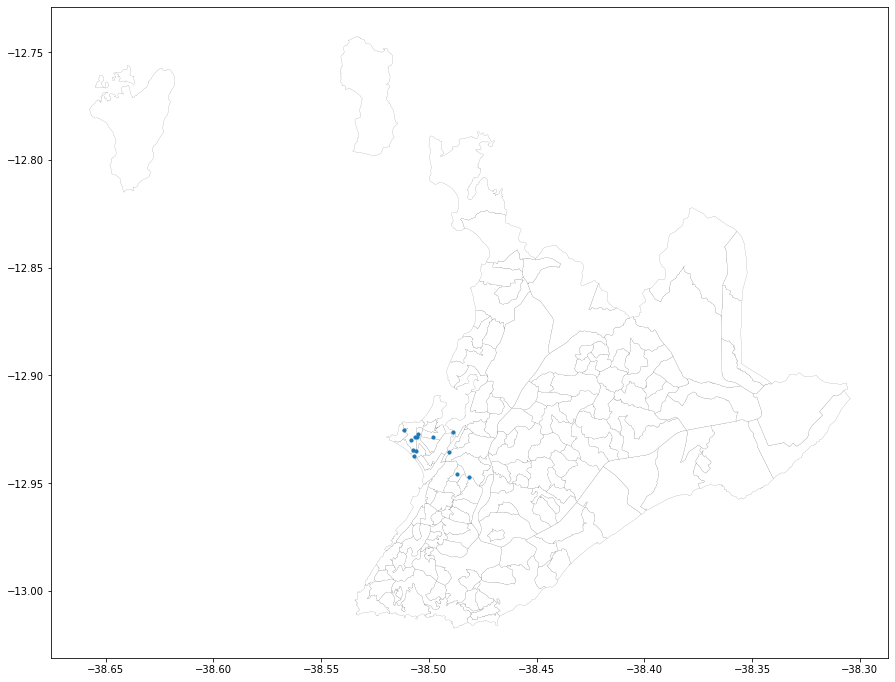

In [501]:
fig, ax = plt.subplots(figsize = (15,15))
brr.plot(ax = ax, color = 'white', edgecolor = 'k', linewidth = 0.1);
eqs_saude.plot(ax = ax, markersize = 10);
plt.show();

* **Lendo as inclinações dos nós:**

In [502]:
node_elev = gpd.read_file('rede_itpg_nodes_al.shp')

In [503]:
node_elev.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [504]:
len(node_elev)

5824

In [505]:
node_elev.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   y         5824 non-null   float64 
 1   x         5824 non-null   float64 
 2   osmid     5824 non-null   int64   
 3   highway   50 non-null     object  
 4   Z         5824 non-null   float64 
 5   geometry  5824 non-null   geometry
dtypes: float64(3), geometry(1), int64(1), object(1)
memory usage: 273.1+ KB


# (1) Criando a rede

* **Gerando polígono no entorno dos equipamentos de saúde:**

In [506]:
#print(eqs_saude['geometry'].unary_union.convex_hull)

In [507]:
#cent = eqs_saude['geometry'].unary_union.convex_hull.centroid
#bbox = ox.core.bbox_from_point((cent.y,cent.x), distance=3000, project_utm=False, return_crs=False)

In [508]:
#bbox

* **Gerando o grafo a partir do polígono definido:**

In [509]:
#G = ox.graph_from_bbox(bbox[0], bbox[1], bbox[2], bbox[3], network_type='walk')
#pickle.dump(G, open('grafo_itpg', 'wb'))

In [510]:
G = pickle.load(open('grafo_itpg','rb'))

In [511]:
eqs_saude['TIPO'].value_counts()
tipo = list(eqs_saude['TIPO'].unique())
tipo

HOSPITAL    5
USF         2
UPA         2
UBS         2
PA          1
CAPS        1
Name: TIPO, dtype: int64

['USF', 'HOSPITAL', 'UBS', 'UPA', 'CAPS', 'PA']

In [512]:
len(G.nodes())

5824

* **Adicionando a altitude dos nós:**

In [513]:
elev = pd.Series(node_elev['Z'].values, index = node_elev['osmid']).to_dict()

In [514]:
nx.set_node_attributes(G, elev, 'elev')

In [515]:
nx.get_node_attributes(G, 'elev')

{6806323210: 2.449,
 7233536022: 2.921,
 6806323228: 2.519,
 7233536042: 22.108,
 6806323261: 2.801,
 6806323272: 2.65,
 6806323274: 2.469,
 6806323279: 2.519,
 7261274236: 23.298,
 7267123347: 42.088,
 7267123348: 3.278,
 7546486987: 53.985,
 7546486988: 58.609,
 7546486992: 68.229,
 7546487001: 63.48,
 7546487003: 64.35,
 7546487018: 50.196,
 7546487022: 50.034,
 7546487023: 49.478,
 7260569849: 2.151,
 7546487033: 50.038,
 7260569855: 2.126,
 7260569856: 2.125,
 7260569857: 2.111,
 7260569858: 2.135,
 7260569859: 2.17,
 7238615300: 59.079,
 7260569860: 2.217,
 735232257: 3.37,
 7546487051: 62.649,
 7260569873: 2.093,
 7260569874: 2.202,
 7546487061: 59.678,
 7546487065: 74.334,
 7546487068: 67.694,
 7546487072: 63.271,
 7546487085: 55.915,
 7546487089: 51.862,
 6582878524: 12.031,
 7546487107: 72.069,
 6582878533: 9.188,
 6582878535: 8.67,
 6582878538: 8.87,
 6582878539: 8.913,
 6453346643: 44.055,
 6453346645: 54.576,
 7546487127: 48.906,
 6453346647: 58.201,
 6453346653: 54.328,
 

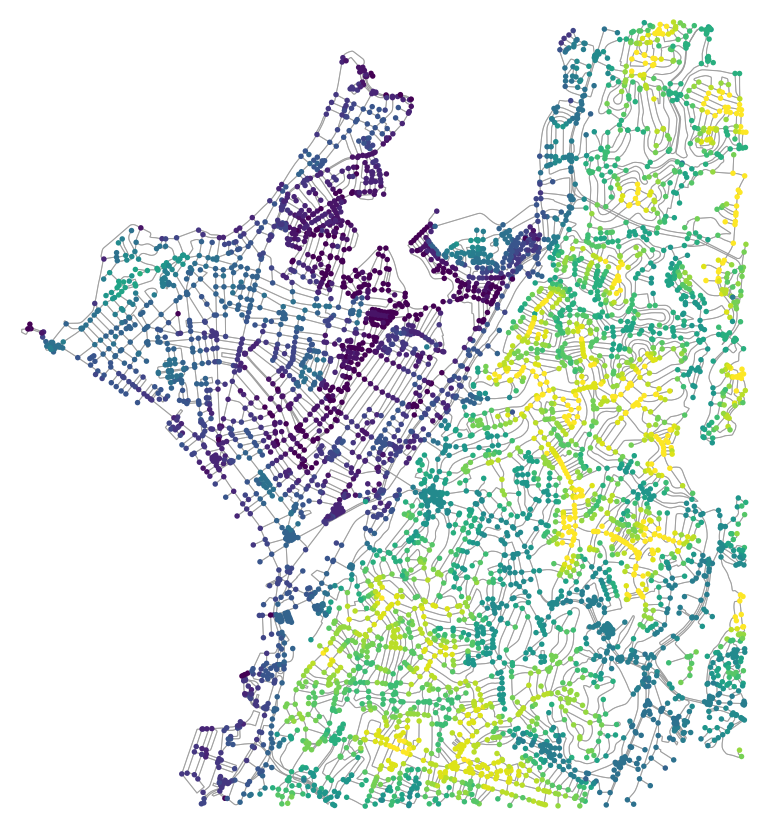

In [516]:
colors = ox.get_node_colors_by_attr(G, 'elev', cmap='viridis', num_bins=20)
fig, ax = ox.plot_graph(G, node_color=colors, edge_alpha=0.75, node_size=30, fig_height = 15,
                        edge_linewidth=1, node_zorder=2, show=False, close=False);
plt.show();

* **Adicionando a inclinação das ligações:**

In [517]:
incl = {} # dictionary to be added to the Graph
for edge in G.edges:
    n1 = edge[0] # edge origin node
    n2 = edge[1] # edge destination node
    
    # getting elevation in the nodes of the edge
    elev_n1 = G.nodes[n1]['elev']
    elev_n2 = G.nodes[n2]['elev']
    
    # length of the edge
    l = G.edges[edge]['length']
    
    # slope in m/m
    slp = (elev_n2 - elev_n1)/l
    
    # Adding slope to dictionary
    incl[edge] = slp
nx.set_edge_attributes(G, incl, 'incl')

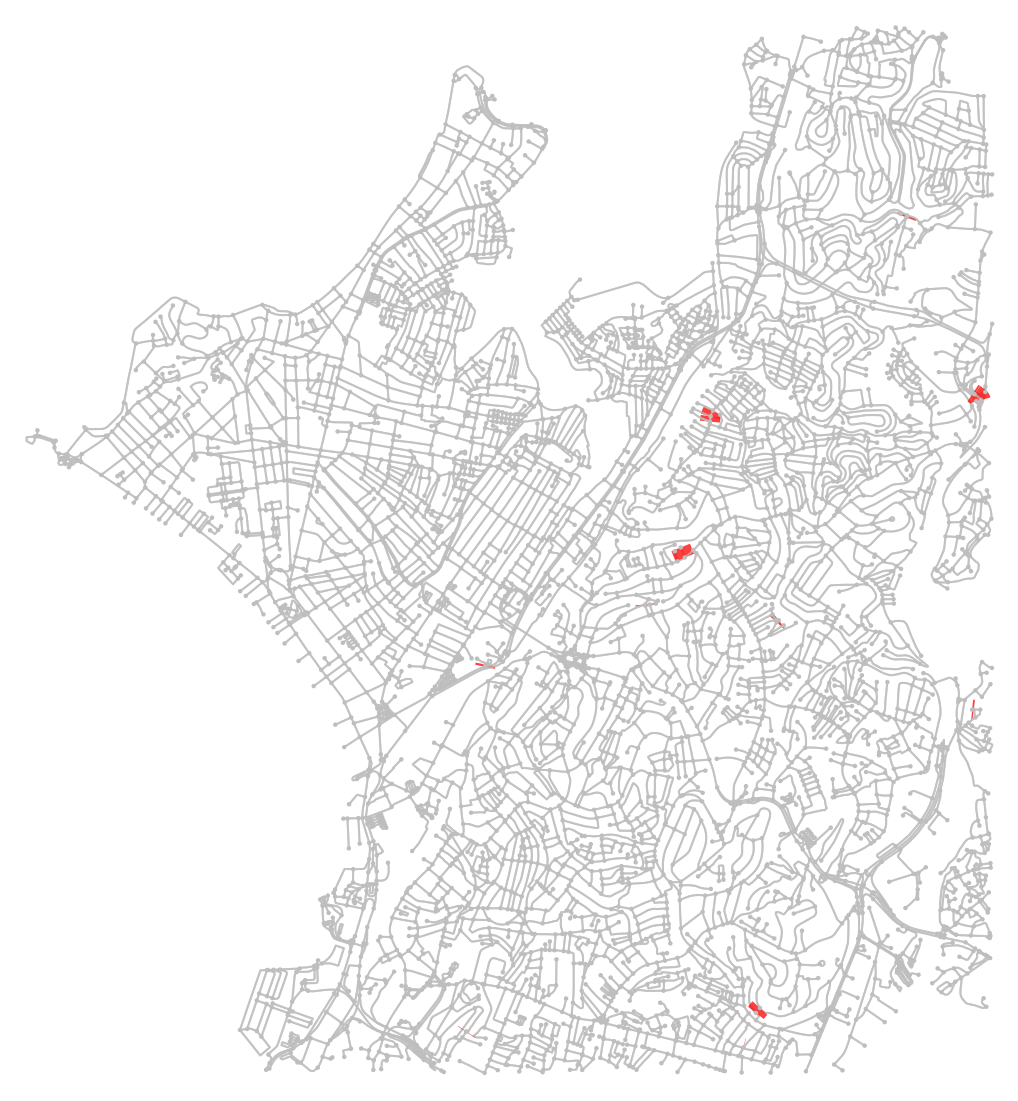

In [518]:
#ec = ox.get_edge_colors_by_attr(G, 'incl', cmap='viridis', num_bins=10, na_color = 'w')
#ec = ['#BEBEBE' if np.isnan(d['incl']) else '#BEBEBE' if d['incl'] < 0.25 else 'red' for u,v,d in G.edges(data = True)]
ec = ['#BEBEBE' if d['incl'] < .54 else 'red' for u,v,d in G.edges(data = True)]
es = [2 if d['incl'] < 0.54 else 20 for u,v,d in G.edges(data = True)]
fig, ax = ox.plot_graph(G, node_color="#BEBEBE", edge_color = ec, edge_alpha=0.75, node_size=20, fig_height = 20,
                        edge_linewidth=es, node_zorder=2, show=False, close=False);
plt.show();

* **Adicionando a extensão real das ligações:**

In [519]:
ext_r = {} # dictionary to be added to the Graph
for edge in G.edges:
    n1 = edge[0] # edge origin node
    n2 = edge[1] # edge destination node
    
    ext_r[edge] = G.edges[edge]['length']/np.cos(np.arctan(abs(G.edges[edge]['incl'])))    
nx.set_edge_attributes(G, ext_r, 'ext_r')

* **Adicionando as velocidades em cada ligação:**

In [520]:
vel_r = {} # dictionary to be added to the Graph
for edge in G.edges:
    n1 = edge[0] # edge origin node
    n2 = edge[1] # edge destination node
    ang = np.arctan(G.edges[edge]['incl'])*180/(np.pi)
    if abs(ang) <= 2:
        vel_r[edge] = 1.1
    elif ang > 2 and ang < 28:
        vel_r[edge] = (-0.2/7)*(abs(ang) - 2) + 1.1
    elif ang < -2 and ang > - 28: 
        vel_r[edge] = (-0.15/7)*(abs(ang) - 2) + 1.05   
    else:
        vel_r[edge] = 0.35
nx.set_edge_attributes(G, vel_r, 'vel_r')

* **Adicionando as tempos em cada ligação:**

In [521]:
tempo_r = {} # dictionary to be added to the Graph
for edge in G.edges:
    n1 = edge[0] # edge origin node
    n2 = edge[1] # edge destination node
    tempo_r[edge] = G.edges[edge]['ext_r']/G.edges[edge]['vel_r']
nx.set_edge_attributes(G, tempo_r, 'tempo_r')

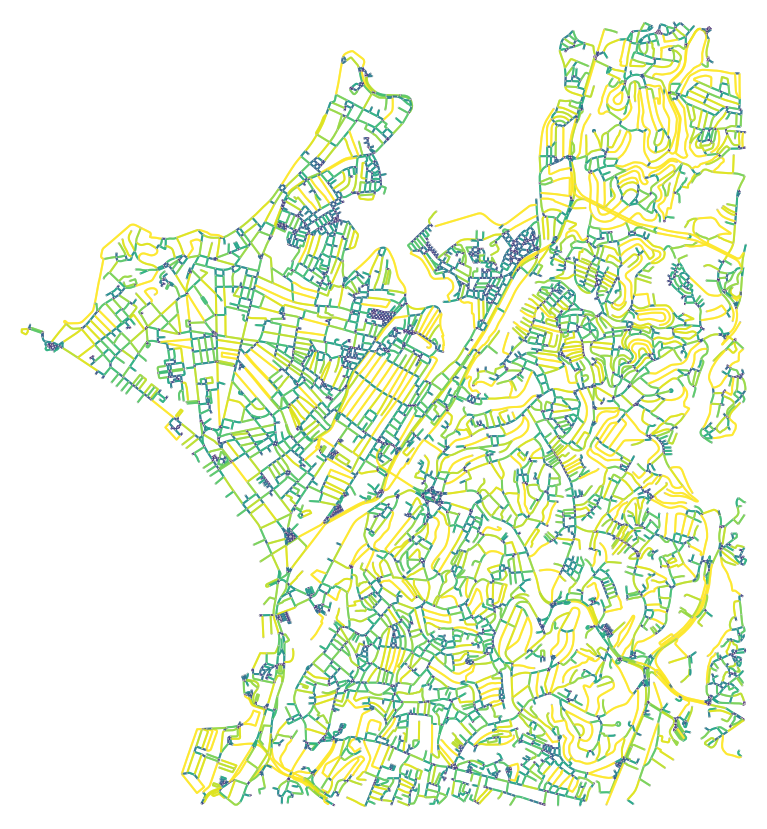

In [523]:
ec = ox.get_edge_colors_by_attr(G, 'tempo_r', cmap='viridis', num_bins=20, na_color = 'w')
fig, ax = ox.plot_graph(G, node_color="#BEBEBE", edge_color = ec, edge_alpha=0.75, node_size=2, fig_height = 15,
                        edge_linewidth=2, node_zorder=2, show=False, close=False);
plt.show();

**Plotando grafo com as unidades:**

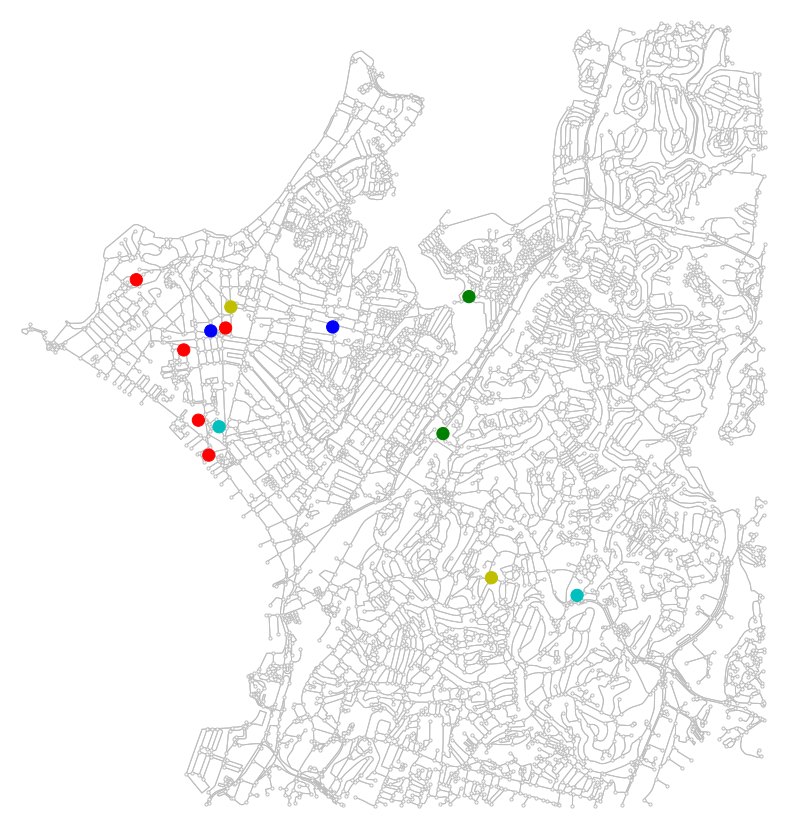

In [524]:
nc = ['g' if i==tipo[0] else 'r' if i==tipo[1] else 'b' if i==tipo[2] else 'c' if i==tipo[3] else 'y' for i in eqs_saude['TIPO']]
fig, ax = ox.plot_graph(G, node_color='w', node_edgecolor="#BEBEBE", node_size=10, fig_height = 15,
                        edge_linewidth=1, edge_color = "#BEBEBE", node_zorder=2, show=False, close=False);
eqs_saude.plot(ax = ax, color = nc, markersize = 150, zorder = 3);
plt.show();

## (2) Nós mais próximos dos equipamentos

### (2.1) PA e UPA:

* **Nós mais próximo do PA ou UPA:**

In [525]:
nn = ox.geo_utils.get_nearest_nodes(G, list(eqs_saude[eqs_saude['TIPO'].isin(['PA','UPA'])]['geometry'].x),
                                     list(eqs_saude[eqs_saude['TIPO'].isin(['PA','UPA'])]['geometry'].y), method=None)

In [526]:
nn

array([7248279552, 1051209554,  974243318], dtype=int64)

In [527]:
eqs_saude[eqs_saude['TIPO'].isin(['PA','UPA'])]

OBJECTID_1  OBJECTID   TEMA  MUN_CODMUN  LOG_CODLOG  PTN_NUMMET  \
9          NaN       NaN   None         NaN         NaN         NaN   
11       417.0     269.0  SAUDE      2740.0       487.0         0.0   
12         1.0       NaN  SAUDE         NaN         NaN         NaN   

    PTN_SEQPTN  POS_POSICA  TPN_CODTEM                       PTN_NOMPTN  ...  \
9          NaN         NaN         NaN                             None  ...   
11         0.0         2.0        18.0  UNIDADE DE EMERGENCIA DO CURUZU  ...   
12         NaN         NaN         NaN                 UPA CIDADE BAIXA  ...   

    PTN_DHULTI  PTN_DLEVAN PTN_METADA            PTA_ABREV verif_PMS TIPO  \
9         None        None       None                 None       sim  UPA   
11  2008-07-01  2008-07-01          6  UNID. EMERG. CURUZU       não   PA   
12        None        None       None                 None      None  UPA   

                                              ENDRECO  \
9   R. do Forno, 1-121 - Santa Monica Salvador - B...   
11              Rua do Curuzu, S/N, Curuzu, Liberdade   
12                                         Largo Roma   

                   TELEFONES                                Nome_PMS  \
9   (71) 3256-2404 3481-8033                  \nUPA San Martin (24h)   
11             (71)3256-1443  Unidade de Emergência Mãe Hilda Jitolu   
12                      None                        Upa Cidade Baixa   

                       geometry  
9   POINT (-38.48118 -12.94701)  
11  POINT (-38.48710 -12.94579)  
12  POINT (-38.50593 -12.93535)  

[3 rows x 23 columns]

* **Caminhos mais curtos até o PA ou UPAs:**

In [540]:
sp = np.zeros((len(G.nodes()),len(nn)))
for i, n in enumerate(G.nodes()):
    for j, v in enumerate(nn):
        sp[i,j] = nx.shortest_path_length(G, n, v, weight = 'tempo_r')

In [541]:
sp = sp.min(1)

In [542]:
sp = {n:sp for (n, sp) in zip(G.nodes(), sp)}

In [543]:
nx.set_node_attributes(G, sp, 't_UPA')

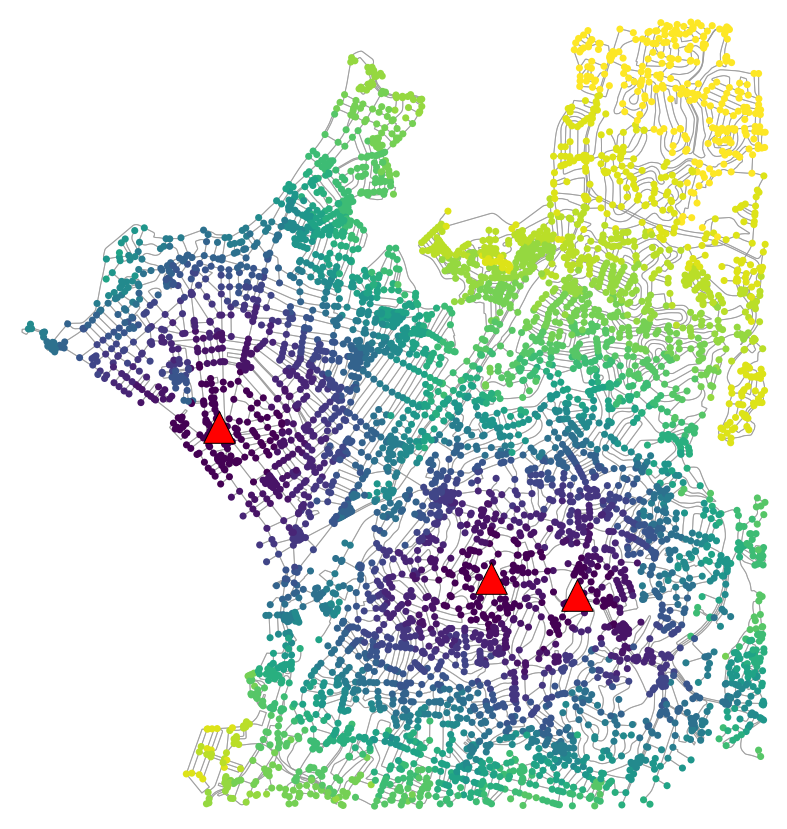

In [544]:
colors = ox.get_node_colors_by_attr(G, 't_UPA', cmap='viridis', num_bins=20);
fig, ax = ox.plot_graph(G, node_color=colors, edge_alpha=0.75, node_size=50, fig_height = 15,
                        edge_linewidth=1, node_zorder=2, show=False, close=False);
eqs_saude[eqs_saude['TIPO'].isin(['PA','UPA'])].plot(ax = ax, color = 'red', edgecolor = 'k', markersize = 1000, marker = '^', zorder = 3)
plt.show();

### (2.2) UBS:

* **Nós mais próximo das UBS:**

In [545]:
nn = ox.geo_utils.get_nearest_nodes(G, list(eqs_saude[eqs_saude['TIPO']=='UBS']['geometry'].x),
                                     list(eqs_saude[eqs_saude['TIPO']=='UBS']['geometry'].y), method=None)

In [546]:
nn

array([ 973837684, 3942904502], dtype=int64)

* **Caminhos mais curtos até a UBS mais próxima:**

In [547]:
sp = np.zeros((len(G.nodes()),len(nn)))
for i, n in enumerate(G.nodes()):
    for j, v in enumerate(nn):
        sp[i,j] = nx.shortest_path_length(G, n, v, weight = 'tempo_r')

In [548]:
sp = sp.min(1)

In [549]:
sp = {n:sp for (n, sp) in zip(G.nodes(), sp)}

In [550]:
nx.set_node_attributes(G, sp, 't_UBS')

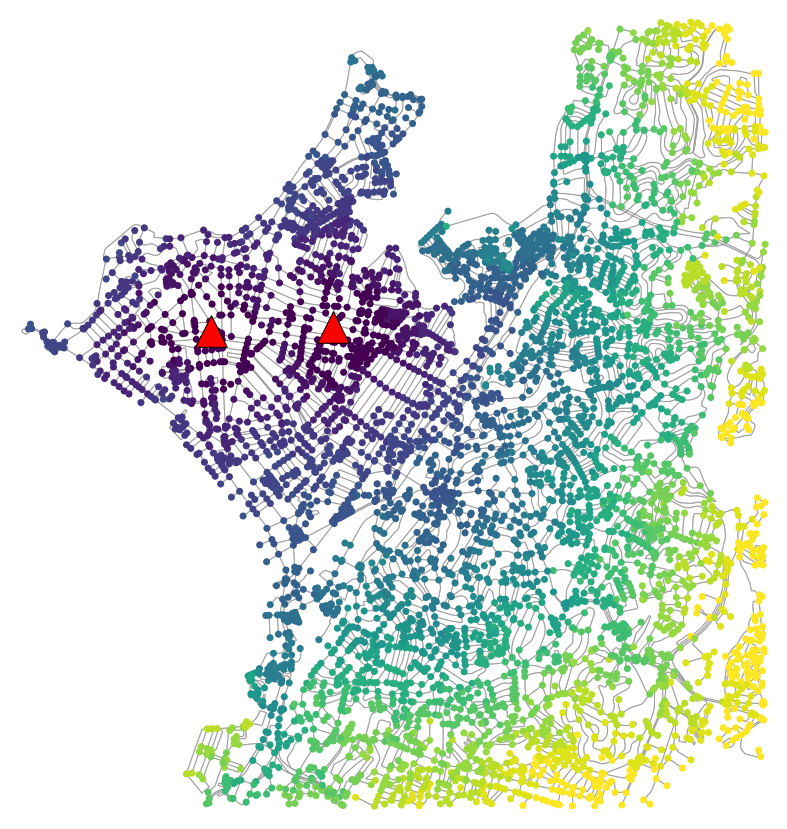

In [551]:
colors = ox.get_node_colors_by_attr(G, 't_UBS', cmap='viridis', num_bins=20);
fig, ax = ox.plot_graph(G, node_color=colors, edge_alpha=0.75, node_size=50, fig_height = 15,
                        edge_linewidth=1, node_zorder=2, show=False, close=False);
eqs_saude[eqs_saude['TIPO']=='UBS'].plot(ax = ax, color = 'red', edgecolor = 'k', markersize = 1000, marker = '^', zorder = 3)
plt.show();

### (2.3) Hospitais:

* **Nós mais próximo das Hospitais:**

In [552]:
nn = ox.geo_utils.get_nearest_nodes(G, list(eqs_saude[eqs_saude['TIPO']=='HOSPITAL']['geometry'].x),
                                    list(eqs_saude[eqs_saude['TIPO']=='HOSPITAL']['geometry'].y), method=None)

In [553]:
nn

array([7281168305, 6315585406, 7227533611, 4265482943, 1005901268],
      dtype=int64)

* **Caminhos mais curtos até o Hospital mais próximo:**

In [554]:
sp = np.zeros((len(G.nodes()),len(nn)))
for i, n in enumerate(G.nodes()):
    for j, v in enumerate(nn):
        sp[i,j] = nx.shortest_path_length(G, n, v, weight = 'tempo_r')

In [555]:
sp = sp.min(1)

In [556]:
sp = {n:sp for (n, sp) in zip(G.nodes(), sp)}

In [557]:
nx.set_node_attributes(G, sp, 't_HOSP')

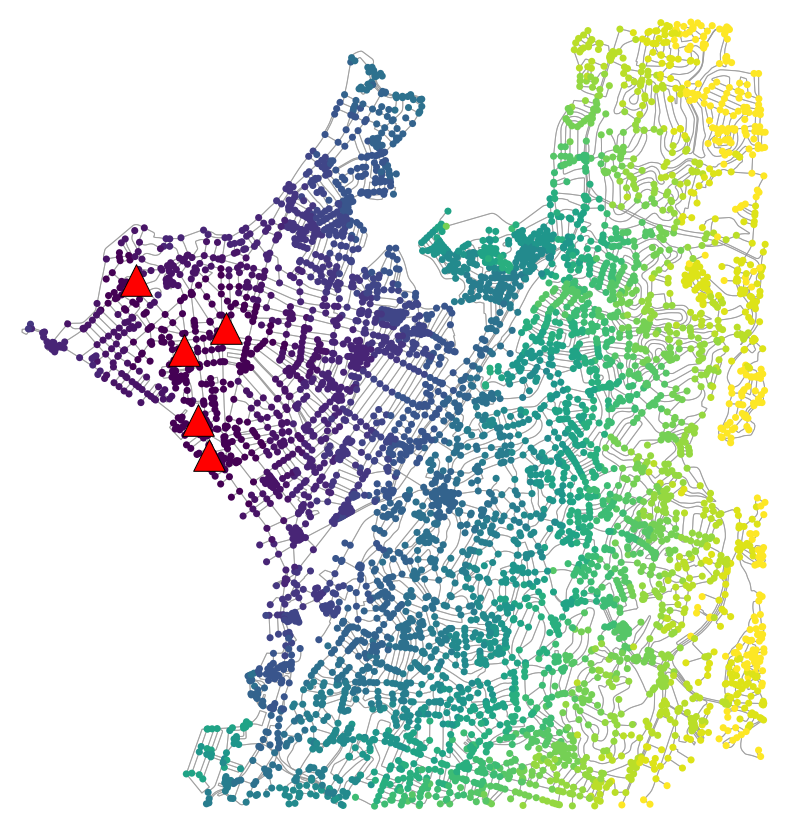

In [558]:
colors = ox.get_node_colors_by_attr(G, 't_HOSP', cmap='viridis', num_bins=20);
fig, ax = ox.plot_graph(G, node_color=colors, edge_alpha=0.75, node_size=50, fig_height = 15,
                        edge_linewidth=1, node_zorder=2, show=False, close=False);
eqs_saude[eqs_saude['TIPO']=='HOSPITAL'].plot(ax = ax, color = 'red', edgecolor = 'k', markersize = 1000, marker = '^', zorder = 3)
plt.show();

### (2.4) Salvando em Shapefile

In [559]:
G_gdf = ox.graph_to_gdfs(G, nodes=True, edges=True) 

In [560]:
G_gdf[0]

y          x       osmid    elev        d_UPA  \
6806323210 -12.910749 -38.495436  6806323210   2.449  2909.721413   
7233536022 -12.948362 -38.501677  7233536022   2.921  1500.838520   
6806323228 -12.911141 -38.495144  6806323228   2.519  2871.177783   
7233536042 -12.940833 -38.490766  7233536042  22.108  1051.800107   
6806323261 -12.912732 -38.492491  6806323261   2.801  2938.510770   
...               ...        ...         ...     ...          ...   
3075899294 -12.908789 -38.476348  3075899294  57.196  4940.041086   
7279853513 -12.958296 -38.483468  7279853513  54.470  1737.711361   
7279853518 -12.958509 -38.483220  7279853518  50.573  1852.524883   
619741177  -12.960629 -38.498397   619741177  26.478  2501.392892   
619741179  -12.961458 -38.497480   619741179  25.257  2672.886908   

                  t_UPA        t_UBS       t_HOSP highway  \
6806323210  2909.721413  2199.654795  2357.307416     NaN   
7233536022  1500.838520  2208.015325  1276.384999     NaN   
6806323228  2871.177783  2161.111165  2318.763786     NaN   
7233536042  1051.800107  1816.918940  2166.343811     NaN   
6806323261  2938.510770  2092.135773  2422.125708     NaN   
...                 ...          ...          ...     ...   
3075899294  4940.041086  4187.347307  4959.451474     NaN   
7279853513  1737.711361  4659.238328  4274.837158     NaN   
7279853518  1852.524883  4774.051850  4363.464050     NaN   
619741177   2501.392892  3692.455729  2765.346561     NaN   
619741179   2672.886908  3997.881983  3070.772815     NaN   

                               geometry  
6806323210  POINT (-38.49544 -12.91075)  
7233536022  POINT (-38.50168 -12.94836)  
6806323228  POINT (-38.49514 -12.91114)  
7233536042  POINT (-38.49077 -12.94083)  
6806323261  POINT (-38.49249 -12.91273)  
...                                 ...  
3075899294  POINT (-38.47635 -12.90879)  
7279853513  POINT (-38.48347 -12.95830)  
7279853518  POINT (-38.48322 -12.95851)  
619741177   POINT (-38.49840 -12.96063)  
619741179   POINT (-38.49748 -12.96146)  

[5824 rows x 10 columns]

In [561]:
G_gdf[0].to_file('rede_itpg_nodes.shp')

In [562]:
G_gdf[1]

u           v  key      osmid  oneway         highway  \
0      6806323210  4265482917    0  427316496   False  secondary_link   
1      6806323210  3942935988    0  427316496   False  secondary_link   
2      6806323210   838575394    0  725946687   False         service   
3      7233536022  7242299759    0  776211367   False         service   
4      7233536022  5421816908    0  562387376   False         primary   
...           ...         ...  ...        ...     ...             ...   
15901  7279853518   975475111    0   83754671   False         footway   
15902   619741177  2753102653    0  298218872   False           trunk   
15903   619741177  4243117678    0  427314823   False      trunk_link   
15904   619741179  3940929183    0  809278427   False           trunk   
15905   619741179  3986605275    0  809278427   False           trunk   

        length                                           geometry      incl  \
0       16.139  LINESTRING (-38.49544 -12.91075, -38.49549 -12... -0.002478   
1       22.070  LINESTRING (-38.49544 -12.91075, -38.49538 -12...  0.001541   
2      194.342  LINESTRING (-38.49544 -12.91075, -38.49539 -12...  0.001173   
3       23.406  LINESTRING (-38.50168 -12.94836, -38.50189 -12... -0.051525   
4      149.310  LINESTRING (-38.50168 -12.94836, -38.50167 -12...  0.005874   
...        ...                                                ...       ...   
15901   15.893  LINESTRING (-38.48322 -12.95851, -38.48317 -12...  0.076575   
15902  164.719  LINESTRING (-38.49840 -12.96063, -38.49859 -12... -0.007631   
15903  156.246  LINESTRING (-38.49840 -12.96063, -38.49861 -12... -0.044539   
15904   16.545  LINESTRING (-38.49748 -12.96146, -38.49735 -12... -0.025325   
15905   62.811  LINESTRING (-38.49748 -12.96146, -38.49798 -12...  0.022194   

            ext_r  ...     tempo_r                                  name  \
0       16.139050  ...   14.671863                                   NaN   
1       22.070026  ...   20.063660                                   NaN   
2      194.342134  ...  176.674667                                   NaN   
3       23.437049  ...   22.762106                                   NaN   
4      149.312576  ...  135.738705       Avenida Engenheiro Oscar Pontes   
...           ...  ...         ...                                   ...   
15901   15.939528  ...   15.444789                                   NaN   
15902  164.723796  ...  149.748906  Via Expressa Baía de Todos os Santos   
15903  156.400896  ...  150.644748  Via Expressa Baía de Todos os Santos   
15904   16.550305  ...   15.045732                     Estrada da Rainha   
15905   62.826467  ...   57.114970                     Estrada da Rainha   

      lanes maxspeed tunnel service access bridge junction width  
0       NaN      NaN    NaN     NaN    NaN    NaN      NaN   NaN  
1       NaN      NaN    NaN     NaN    NaN    NaN      NaN   NaN  
2       NaN      NaN    NaN     NaN    NaN    NaN      NaN   NaN  
3       NaN      NaN    NaN     NaN    NaN    NaN      NaN   NaN  
4         3       60    NaN     NaN    NaN    NaN      NaN   NaN  
...     ...      ...    ...     ...    ...    ...      ...   ...  
15901   NaN      NaN    NaN     NaN    NaN    NaN      NaN   NaN  
15902   NaN      NaN    NaN     NaN    NaN    NaN      NaN   NaN  
15903   NaN      NaN    NaN     NaN    NaN    NaN      NaN   NaN  
15904   NaN      NaN    NaN     NaN    NaN    NaN      NaN   NaN  
15905   NaN      NaN    NaN     NaN    NaN    NaN      NaN   NaN  

[15906 rows x 21 columns]

In [563]:
for i in list(G_gdf[1].columns):
    tp = []
    for j in G_gdf[1][i]:
        tp.append(isinstance(j, list))
    print(i,sum(tp))

u 0
v 0
key 0
osmid 982
oneway 0
highway 390
length 0
geometry 0
incl 0
ext_r 0
vel_r 0
tempo_r 0
name 244
lanes 0
maxspeed 4
tunnel 0
service 0
access 0
bridge 0
junction 0
width 0


In [564]:
G_gdf[1].drop(columns=['osmid','highway','name','maxspeed']).to_file('rede_itpg_links.shp')